In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from wordcloud import WordCloud

In [2]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Conv1D, MaxPool1D
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [3]:
 train = pd.read_csv("/DESCRIPTION_y.1/combined_colorectal_dataframes.csv")

In [7]:
test = pd.read_excel("/DESCRIPTION_y.1/Colorectal_Test.xlsx")

/usr/local/lib/python3.7/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [8]:
train.head()

,Unnamed: 0,START_x,STOP_x,PATIENT,ENCOUNTER_x,CODE_x,DESCRIPTION_x,START_y,STOP_y,ENCOUNTER_y,...,VALUE,UNITS,TYPE,DATE_y,ENCOUNTER_y.1,CODE_y.1,DESCRIPTION_y.1,COST_y,REASONCODE_y,REASONDESCRIPTION_y
0,0,2004-08-08,NaN,58af950c-f42c-4891-a722-fde654454e63,dafe79f7-43d2-4ddb-a284-7bf554ac836b,230690007,Stroke,2004-08-08,2004-08-08,dafe79f7-43d2-4ddb-a284-7bf554ac836b,...,Stroke,NaN,text,2004-08-08,dafe79f7-43d2-4ddb-a284-7bf554ac836b,433112001,Percutaneous mechanical thrombectomy of portal...,34312.86,230690007,Stroke
1,1,2004-08-08,NaN,58af950c-f42c-4891-a722-fde654454e63,dafe79f7-43d2-4ddb-a284-7bf554ac836b,230690007,Stroke,2004-08-08,2004-08-08,dafe79f7-43d2-4ddb-a284-7bf554ac836b,...,Stroke,NaN,text,2004-08-08,dafe79f7-43d2-4ddb-a284-7bf554ac836b,433112001,Percutaneous mechanical thrombectomy of portal...,34312.86,230690007,Stroke
2,2,1980-07-17,NaN,1d841380-a424-4e88-b1c6-a100a91ed007,e4fc3a39-be0b-48d2-8d4a-0d7ddd4c48bc,53741008,Coronary Heart Disease,1980-07-17,NaN,e4fc3a39-be0b-48d2-8d4a-0d7ddd4c48bc,...,Cardiac Arrest,NaN,text,1994-06-23,10ec9d6f-e5ea-48d1-89c4-415ea0e2ae87,447365002,Insertion of biventricular implantable cardiov...,30243.93,410429000,Cardiac Arrest
3,3,1980-07-17,NaN,1d841380-a424-4e88-b1c6-a100a91ed007,e4fc3a39-be0b-48d2-8d4a-0d7ddd4c48bc,53741008,Coronary Heart Disease,1980-07-17,NaN,e4fc3a39-be0b-48d2-8d4a-0d7ddd4c48bc,...,Cardiac Arrest,NaN,text,1994-06-23,10ec9d6f-e5ea-48d1-89c4-415ea0e2ae87,18286008,Catheter ablation of tissue of heart,11569.46,410429000,Cardiac Arrest
4,4,1980-07-17,NaN,1d841380-a424-4e88-b1c6-a100a91ed007,e4fc3a39-be0b-48d2-8d4a-0d7ddd4c48bc,53741008,Coronary Heart Disease,1980-07-17,NaN,e4fc3a39-be0b-48d2-8d4a-0d7ddd4c48bc,...,Cardiac Arrest,NaN,text,1998-10-15,92d10eaf-9847-470a-9b3d-a75a048eca6a,447365002,Insertion of biventricular implantable cardiov...,14999.99,410429000,Cardiac Arrest


In [9]:
test.head()

,Unnamed: 0,START_x,STOP_x,PATIENT,ENCOUNTER_x,CODE_x,DESCRIPTION_x,START_y,STOP_y,ENCOUNTER_y,...,VALUE,UNITS,TYPE,DATE_y,ENCOUNTER_y.1,CODE_y.1,DESCRIPTION_y.1,COST_y,REASONCODE_y,REASONDESCRIPTION_y
0,0,2004-08-08,NaN,58af950c-f42c-4891-a722-fde654454e63,dafe79f7-43d2-4ddb-a284-7bf554ac836b,230690007,Stroke,2004-08-08,2004-08-08,dafe79f7-43d2-4ddb-a284-7bf554ac836b,...,Stroke,NaN,text,2004-08-08,dafe79f7-43d2-4ddb-a284-7bf554ac836b,433112001,Percutaneous mechanical thrombectomy of portal...,34312.86,230690007,Stroke
1,1,2004-08-08,NaN,58af950c-f42c-4891-a722-fde654454e63,dafe79f7-43d2-4ddb-a284-7bf554ac836b,230690007,Stroke,2004-08-08,2004-08-08,dafe79f7-43d2-4ddb-a284-7bf554ac836b,...,Stroke,NaN,text,2004-08-08,dafe79f7-43d2-4ddb-a284-7bf554ac836b,433112001,Percutaneous mechanical thrombectomy of portal...,34312.86,230690007,Stroke
2,2,1980-07-17,NaN,1d841380-a424-4e88-b1c6-a100a91ed007,e4fc3a39-be0b-48d2-8d4a-0d7ddd4c48bc,53741008,Coronary Heart Disease,1980-07-17,NaT,e4fc3a39-be0b-48d2-8d4a-0d7ddd4c48bc,...,Cardiac Arrest,NaN,text,1994-06-23,10ec9d6f-e5ea-48d1-89c4-415ea0e2ae87,447365002,Insertion of biventricular implantable cardiov...,30243.93,410429000,Cardiac Arrest
3,3,1980-07-17,NaN,1d841380-a424-4e88-b1c6-a100a91ed007,e4fc3a39-be0b-48d2-8d4a-0d7ddd4c48bc,53741008,Coronary Heart Disease,1980-07-17,NaT,e4fc3a39-be0b-48d2-8d4a-0d7ddd4c48bc,...,Cardiac Arrest,NaN,text,1994-06-23,10ec9d6f-e5ea-48d1-89c4-415ea0e2ae87,18286008,Catheter ablation of tissue of heart,11569.46,410429000,Cardiac Arrest
4,4,1980-07-17,NaN,1d841380-a424-4e88-b1c6-a100a91ed007,e4fc3a39-be0b-48d2-8d4a-0d7ddd4c48bc,53741008,Coronary Heart Disease,1980-07-17,NaT,e4fc3a39-be0b-48d2-8d4a-0d7ddd4c48bc,...,Cardiac Arrest,NaN,text,1998-10-15,92d10eaf-9847-470a-9b3d-a75a048eca6a,447365002,Insertion of biventricular implantable cardiov...,14999.99,410429000,Cardiac Arrest


In [10]:
test.shape

(199, 31)

In [11]:
train.shape

(954, 31)

In [13]:
train["DESCRIPTION_y.1"].tolist()

['Percutaneous mechanical thrombectomy of portal vein using fluoroscopic guidance',
 'Percutaneous mechanical thrombectomy of portal vein using fluoroscopic guidance',
 'Insertion of biventricular implantable cardioverter defibrillator',
 'Catheter ablation of tissue of heart',
 'Insertion of biventricular implantable cardioverter defibrillator',
 'Catheter ablation of tissue of heart',
 'Insertion of biventricular implantable cardioverter defibrillator',
 'Catheter ablation of tissue of heart',
 'Insertion of biventricular implantable cardioverter defibrillator',
 'Catheter ablation of tissue of heart',
 'Insertion of biventricular implantable cardioverter defibrillator',
 'Catheter ablation of tissue of heart',
 'Insertion of biventricular implantable cardioverter defibrillator',
 'Catheter ablation of tissue of heart',
 'Insertion of biventricular implantable cardioverter defibrillator',
 'Catheter ablation of tissue of heart',
 'Insertion of biventricular implantable cardioverter d

In [14]:
 text = ' '.join(str(train["DESCRIPTION_y.1"].tolist()))

In [16]:
counts = train["DESCRIPTION_y.1"].sample(frac=.07).value_counts()

In [17]:
counts

Percutaneous coronary intervention                                                 24
Catheter ablation of tissue of heart                                               16
Insertion of biventricular implantable cardioverter defibrillator                  14
Coronary artery bypass grafting                                                    11
Percutaneous mechanical thrombectomy of portal vein using fluoroscopic guidance     2
Name: DESCRIPTION_y.1, dtype: int64

In [18]:
counts.index = counts.index.map(str)


In [ ]:
#wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(counts)
#plt.figure(figsize=(100, 100))
#plt.imshow(wordcloud, interpolation="bilinear")
#plt.axis("off")
#plt.show(wordcloud)
 

In [19]:
test["DESCRIPTION_y.1"].tolist()

['Percutaneous mechanical thrombectomy of portal vein using fluoroscopic guidance',
 'Percutaneous mechanical thrombectomy of portal vein using fluoroscopic guidance',
 'Insertion of biventricular implantable cardioverter defibrillator',
 'Catheter ablation of tissue of heart',
 'Insertion of biventricular implantable cardioverter defibrillator',
 'Catheter ablation of tissue of heart',
 'Insertion of biventricular implantable cardioverter defibrillator',
 'Catheter ablation of tissue of heart',
 'Insertion of biventricular implantable cardioverter defibrillator',
 'Catheter ablation of tissue of heart',
 'Insertion of biventricular implantable cardioverter defibrillator',
 'Catheter ablation of tissue of heart',
 'Insertion of biventricular implantable cardioverter defibrillator',
 'Catheter ablation of tissue of heart',
 'Insertion of biventricular implantable cardioverter defibrillator',
 'Catheter ablation of tissue of heart',
 'Insertion of biventricular implantable cardioverter d

In [20]:
 text = ' '.join(str(test["DESCRIPTION_y.1"].tolist()))

In [21]:
counts = test["DESCRIPTION_y.1"].sample(frac=.07).value_counts()

In [22]:
counts

Catheter ablation of tissue of heart                                 7
Insertion of biventricular implantable cardioverter defibrillator    4
Coronary artery bypass grafting                                      2
Percutaneous coronary intervention                                   1
Name: DESCRIPTION_y.1, dtype: int64

In [ ]:
#wordcloud = WordCloud(width=1600, height=800).generate_from_frequencies(counts)
#plt.figure(figsize=(100, 100))
#plt.imshow(wordcloud, interpolation="bilinear")
#plt.axis("off")
#plt.show()

In [25]:
test["DESCRIPTION_y.1"] = test["DESCRIPTION_y.1"] + ' ' + test['DESCRIPTION_y.1']
train["DESCRIPTION_y.1"] = train["DESCRIPTION_y.1"] + ' ' + train['DESCRIPTION_y.1']

In [26]:
test["DESCRIPTION_y.1"] = test["DESCRIPTION_y.1"].apply(lambda x: str(x).lower())
train["DESCRIPTION_y.1"] = train["DESCRIPTION_y.1"].apply(lambda x: str(x).lower())

In [27]:
test['class'] = 0
train['class'] = 1

In [28]:
test.columns

Index(['Unnamed: 0', 'START_x', 'STOP_x', 'PATIENT', 'ENCOUNTER_x', 'CODE_x',
       'DESCRIPTION_x', 'START_y', 'STOP_y', 'ENCOUNTER_y', 'CODE_y',
       'DESCRIPTION_y', 'COST_x', 'DISPENSES', 'TOTALCOST', 'REASONCODE_x',
       'REASONDESCRIPTION_x', 'DATE_x', 'ENCOUNTER_x.1', 'CODE_x.1',
       'DESCRIPTION_x.1', 'VALUE', 'UNITS', 'TYPE', 'DATE_y', 'ENCOUNTER_y.1',
       'CODE_y.1', 'DESCRIPTION_y.1', 'COST_y', 'REASONCODE_y',
       'REASONDESCRIPTION_y', 'class'],
      dtype='object')

In [29]:
train.columns

Index(['Unnamed: 0', 'START_x', 'STOP_x', 'PATIENT', 'ENCOUNTER_x', 'CODE_x',
       'DESCRIPTION_x', 'START_y', 'STOP_y', 'ENCOUNTER_y', 'CODE_y',
       'DESCRIPTION_y', 'COST_x', 'DISPENSES', 'TOTALCOST', 'REASONCODE_x',
       'REASONDESCRIPTION_x', 'DATE_x', 'ENCOUNTER_x.1', 'CODE_x.1',
       'DESCRIPTION_x.1', 'VALUE', 'UNITS', 'TYPE', 'DATE_y', 'ENCOUNTER_y.1',
       'CODE_y.1', 'DESCRIPTION_y.1', 'COST_y', 'REASONCODE_y',
       'REASONDESCRIPTION_y', 'class'],
      dtype='object')

In [30]:
test = test[["DESCRIPTION_y.1", "class"]]
train = train[["DESCRIPTION_y.1", "class"]]

In [31]:
test.head(10)

,DESCRIPTION_y.1,class
0,percutaneous mechanical thrombectomy of portal...,0
1,percutaneous mechanical thrombectomy of portal...,0
2,insertion of biventricular implantable cardiov...,0
3,catheter ablation of tissue of heart catheter ...,0
4,insertion of biventricular implantable cardiov...,0
5,catheter ablation of tissue of heart catheter ...,0
6,insertion of biventricular implantable cardiov...,0
7,catheter ablation of tissue of heart catheter ...,0
8,insertion of biventricular implantable cardiov...,0
9,catheter ablation of tissue of heart catheter ...,0


In [32]:
train.head(10)

,DESCRIPTION_y.1,class
0,percutaneous mechanical thrombectomy of portal...,1
1,percutaneous mechanical thrombectomy of portal...,1
2,insertion of biventricular implantable cardiov...,1
3,catheter ablation of tissue of heart catheter ...,1
4,insertion of biventricular implantable cardiov...,1
5,catheter ablation of tissue of heart catheter ...,1
6,insertion of biventricular implantable cardiov...,1
7,catheter ablation of tissue of heart catheter ...,1
8,insertion of biventricular implantable cardiov...,1
9,catheter ablation of tissue of heart catheter ...,1


In [33]:
data = test.append(train, ignore_index=True)

In [34]:
data.sample(10)

,DESCRIPTION_y.1,class
193,coronary artery bypass grafting coronary arter...,0
857,insertion of biventricular implantable cardiov...,1
291,insertion of biventricular implantable cardiov...,1
788,catheter ablation of tissue of heart catheter ...,1
157,catheter ablation of tissue of heart catheter ...,0
710,catheter ablation of tissue of heart catheter ...,1
537,percutaneous coronary intervention percutaneou...,1
659,insertion of biventricular implantable cardiov...,1
757,percutaneous coronary intervention percutaneou...,1
166,percutaneous coronary intervention percutaneou...,0


In [35]:
!pip install spacy==2.2.3
!python -m spacy download en_core_web_sm
!pip install beautifulsoup4==4.9.1
!pip install textblob==0.15.3

     |████████████████████████████████| 10.4 MB 4.7 MB/s 
     |████████████████████████████████| 2.2 MB 33.3 MB/s 
  Attempting uninstall: thinc
    Found existing installation: thinc 7.4.0
    Uninstalling thinc-7.4.0:
      Successfully uninstalled thinc-7.4.0
  Attempting uninstall: spacy
    Found existing installation: spacy 2.2.4
    Uninstalling spacy-2.2.4:
      Successfully uninstalled spacy-2.2.4
     |████████████████████████████████| 12.0 MB 4.2 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
     |████████████████████████████████| 115 kB 3.9 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [36]:
pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git --upgrade --force-reinstall

  Cloning https://github.com/laxmimerit/preprocess_kgptalkie.git to /tmp/pip-req-build-i6vkhuo4
  Running command git clone -q https://github.com/laxmimerit/preprocess_kgptalkie.git /tmp/pip-req-build-i6vkhuo4
  Created wheel for preprocess-kgptalkie: filename=preprocess_kgptalkie-0.1.3-py3-none-any.whl size=11756 sha256=9385c3667ed6c52cecef6c098ac575d70293940c74462906a1760559db6e888e
  Stored in directory: /tmp/pip-ephem-wheel-cache-j3ah_tsi/wheels/0d/b3/29/bfe3deffda68980088d17b81331be6667e837ffb4a071bae82
Successfully built preprocess-kgptalkie


In [37]:
import preprocess_kgptalkie as ps


In [38]:
data["DESCRIPTION_y.1"].apply(lambda x: ps.remove_special_chars(x))

0       percutaneous mechanical thrombectomy of portal...
1       percutaneous mechanical thrombectomy of portal...
2       insertion of biventricular implantable cardiov...
3       catheter ablation of tissue of heart catheter ...
4       insertion of biventricular implantable cardiov...
                              ...                        
1148    coronary artery bypass grafting coronary arter...
1149    percutaneous coronary intervention percutaneou...
1150    coronary artery bypass grafting coronary arter...
1151    percutaneous coronary intervention percutaneou...
1152    coronary artery bypass grafting coronary arter...
Name: DESCRIPTION_y.1, Length: 1153, dtype: object

In [39]:
data.head()

,DESCRIPTION_y.1,class
0,percutaneous mechanical thrombectomy of portal...,0
1,percutaneous mechanical thrombectomy of portal...,0
2,insertion of biventricular implantable cardiov...,0
3,catheter ablation of tissue of heart catheter ...,0
4,insertion of biventricular implantable cardiov...,0


In [40]:
!pip install gensim==3.8.3

     |████████████████████████████████| 24.2 MB 4.3 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [41]:
import gensim

In [42]:
y = data['class'].values

In [43]:
data['DESCRIPTION_y.1'].tolist()

['percutaneous mechanical thrombectomy of portal vein using fluoroscopic guidance percutaneous mechanical thrombectomy of portal vein using fluoroscopic guidance',
 'percutaneous mechanical thrombectomy of portal vein using fluoroscopic guidance percutaneous mechanical thrombectomy of portal vein using fluoroscopic guidance',
 'insertion of biventricular implantable cardioverter defibrillator insertion of biventricular implantable cardioverter defibrillator',
 'catheter ablation of tissue of heart catheter ablation of tissue of heart',
 'insertion of biventricular implantable cardioverter defibrillator insertion of biventricular implantable cardioverter defibrillator',
 'catheter ablation of tissue of heart catheter ablation of tissue of heart',
 'insertion of biventricular implantable cardioverter defibrillator insertion of biventricular implantable cardioverter defibrillator',
 'catheter ablation of tissue of heart catheter ablation of tissue of heart',
 'insertion of biventricular i

In [44]:
x = [i.split() for i in data["DESCRIPTION_y.1"].tolist()]

In [45]:
print(x)

[['percutaneous', 'mechanical', 'thrombectomy', 'of', 'portal', 'vein', 'using', 'fluoroscopic', 'guidance', 'percutaneous', 'mechanical', 'thrombectomy', 'of', 'portal', 'vein', 'using', 'fluoroscopic', 'guidance'], ['percutaneous', 'mechanical', 'thrombectomy', 'of', 'portal', 'vein', 'using', 'fluoroscopic', 'guidance', 'percutaneous', 'mechanical', 'thrombectomy', 'of', 'portal', 'vein', 'using', 'fluoroscopic', 'guidance'], ['insertion', 'of', 'biventricular', 'implantable', 'cardioverter', 'defibrillator', 'insertion', 'of', 'biventricular', 'implantable', 'cardioverter', 'defibrillator'], ['catheter', 'ablation', 'of', 'tissue', 'of', 'heart', 'catheter', 'ablation', 'of', 'tissue', 'of', 'heart'], ['insertion', 'of', 'biventricular', 'implantable', 'cardioverter', 'defibrillator', 'insertion', 'of', 'biventricular', 'implantable', 'cardioverter', 'defibrillator'], ['catheter', 'ablation', 'of', 'tissue', 'of', 'heart', 'catheter', 'ablation', 'of', 'tissue', 'of', 'heart'], ['i

In [46]:
type(x)

list

In [47]:
print(x[0])

['percutaneous', 'mechanical', 'thrombectomy', 'of', 'portal', 'vein', 'using', 'fluoroscopic', 'guidance', 'percutaneous', 'mechanical', 'thrombectomy', 'of', 'portal', 'vein', 'using', 'fluoroscopic', 'guidance']


In [48]:
Dimension = 100
word_2_vec = gensim.models.Word2Vec(sentences=x, size=Dimension, window=10, min_count=1)


In [49]:
len(word_2_vec.wv.vocab)

23

In [50]:
word_2_vec.wv.vocab

{'ablation': <gensim.models.keyedvectors.Vocab at 0x7fba294b5c50>,
 'artery': <gensim.models.keyedvectors.Vocab at 0x7fba294b5d90>,
 'biventricular': <gensim.models.keyedvectors.Vocab at 0x7fba294b5b10>,
 'bypass': <gensim.models.keyedvectors.Vocab at 0x7fba294b5dd0>,
 'cardioverter': <gensim.models.keyedvectors.Vocab at 0x7fba294b5b90>,
 'catheter': <gensim.models.keyedvectors.Vocab at 0x7fba294b5c10>,
 'coronary': <gensim.models.keyedvectors.Vocab at 0x7fba294b5d10>,
 'defibrillator': <gensim.models.keyedvectors.Vocab at 0x7fba294b5bd0>,
 'fluoroscopic': <gensim.models.keyedvectors.Vocab at 0x7fba294b5ad0>,
 'grafting': <gensim.models.keyedvectors.Vocab at 0x7fba294b5e10>,
 'guidance': <gensim.models.keyedvectors.Vocab at 0x7fba294b5990>,
 'heart': <gensim.models.keyedvectors.Vocab at 0x7fba294b5cd0>,
 'implantable': <gensim.models.keyedvectors.Vocab at 0x7fba294b5b50>,
 'insertion': <gensim.models.keyedvectors.Vocab at 0x7fba294b5a10>,
 'intervention': <gensim.models.keyedvectors.Vo

In [52]:
word_2_vec['defibrillator']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([-0.0957397 ,  0.00136152,  0.02717972,  0.1367814 , -0.03629545,
       -0.07578772,  0.18171944,  0.23136915, -0.1894811 , -0.05318327,
        0.1948201 ,  0.09514603,  0.00508194,  0.00344043, -0.14051543,
       -0.19995709, -0.10879762, -0.09855675,  0.03610178,  0.09771478,
       -0.09071796, -0.11431379, -0.17970523,  0.15796906,  0.18219462,
        0.29902595, -0.3378191 , -0.18641122,  0.02071341, -0.17357965,
        0.09489373, -0.05712562,  0.11066538,  0.176019  ,  0.01637566,
        0.09105361,  0.21658707,  0.05467213,  0.1531436 , -0.1046604 ,
        0.11006267,  0.00162677, -0.02860433,  0.25852063,  0.14637637,
        0.11497048, -0.16023517,  0.07633334,  0.11335132, -0.12758435,
       -0.10844504, -0.15772517,  0.14552355,  0.04757186, -0.16882622,
       -0.1721871 , -0.13163118,  0.0896157 , -0.043242  , -0.04990739,
        0.1711329 ,  0.308286  , -0.01408098,  0.07165855, -0.10211701,
       -0.15039557,  0.09625392,  0.15716629,  0.24232697,  0.11

In [53]:
word_2_vec.wv.most_similar('grafting')

[('artery', 0.9989153742790222),
 ('bypass', 0.9983428120613098),
 ('coronary', 0.9962310194969177),
 ('intervention', 0.9711766242980957),
 ('percutaneous', 0.9611629247665405),
 ('mechanical', 0.8801224231719971),
 ('guidance', 0.8790876269340515),
 ('vein', 0.8786572813987732),
 ('fluoroscopic', 0.8783791065216064),
 ('thrombectomy', 0.8780739307403564)]

In [54]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x)

In [55]:
X = tokenizer.texts_to_sequences(x)

In [56]:
tokenizer.word_index

{'ablation': 9,
 'artery': 14,
 'biventricular': 4,
 'bypass': 15,
 'cardioverter': 6,
 'catheter': 8,
 'coronary': 2,
 'defibrillator': 7,
 'fluoroscopic': 22,
 'grafting': 16,
 'guidance': 23,
 'heart': 11,
 'implantable': 5,
 'insertion': 3,
 'intervention': 13,
 'mechanical': 17,
 'of': 1,
 'percutaneous': 12,
 'portal': 19,
 'thrombectomy': 18,
 'tissue': 10,
 'using': 21,
 'vein': 20}

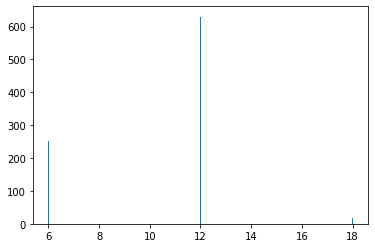

In [57]:
plt.hist([len(x) for x in X], bins=700)
plt.show()

In [58]:
nos = np.array([len(x) for x in X])
len(nos[nos>1000])


0

In [59]:
maxlen = 500
x = pad_sequences(X, maxlen=maxlen)

In [60]:
len(x[0])

500

In [61]:
len(x[3])

500

In [62]:
vocab_size = len(tokenizer.word_index) + 1
vocab = tokenizer.word_index

In [63]:
def get_weight_metrics(model):
  weight_matrix = np.zeros((vocab_size, Dimension))

  for word, i in vocab.items():
    weight_matrix[i] = word_2_vec.wv[word]

  return weight_matrix
   

In [64]:
embedding_vectors = get_weight_metrics(word_2_vec.wv)

In [65]:
embedding_vectors.shape

(24, 100)

In [66]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Conv1D, MaxPool1D
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [67]:
from tensorflow.keras.callbacks import TensorBoard
import time

In [68]:

Name = 'Fake News Detector-{}'.format(int(time.time()))
tensorboard = TensorBoard(log_dir='logs/{}'.format(Name))

In [69]:
model = Sequential()
model.add(Embedding(vocab_size, output_dim = Dimension, weights = [embedding_vectors], input_length = maxlen, trainable = False))
model.add(LSTM(units=128))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [70]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 100)          2400      
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 119,777
Trainable params: 117,377
Non-trainable params: 2,400
_________________________________________________________________


In [71]:
x.shape

(1153, 500)

In [72]:
X_train, X_test, y_train, y_test = train_test_split(x, y)

In [73]:
type(X_train),type(y_train),X_train.shape

(numpy.ndarray, numpy.ndarray, (864, 500))

In [74]:
model.fit(X_train, y_train, validation_split=0.3, epochs=100, callbacks=[tensorboard])

Epoch 1/100
19/19 [==============================] - 9s 146ms/step - loss: 0.5047 - acc: 0.8295 - val_loss: 0.4630 - val_acc: 0.8115
Epoch 2/100
19/19 [==============================] - 2s 95ms/step - loss: 0.4474 - acc: 0.8278 - val_loss: 0.4753 - val_acc: 0.8115
Epoch 3/100
19/19 [==============================] - 2s 95ms/step - loss: 0.4372 - acc: 0.8278 - val_loss: 0.4603 - val_acc: 0.8115
Epoch 4/100
19/19 [==============================] - 2s 99ms/step - loss: 0.4336 - acc: 0.8278 - val_loss: 0.4604 - val_acc: 0.8115
Epoch 5/100
19/19 [==============================] - 2s 98ms/step - loss: 0.4297 - acc: 0.8278 - val_loss: 0.4644 - val_acc: 0.8115
Epoch 6/100
19/19 [==============================] - 2s 95ms/step - loss: 0.4334 - acc: 0.8278 - val_loss: 0.4628 - val_acc: 0.8115
Epoch 7/100
19/19 [==============================] - 2s 95ms/step - loss: 0.4314 - acc: 0.8278 - val_loss: 0.4644 - val_acc: 0.8115
Epoch 8/100
19/19 [==============================] - 2s 96ms/step - loss: 0

In [75]:
y_pred = (model.predict(X_test) >= 0.5).astype(int)

In [76]:
accuracy_score(y_test, y_pred)

0.8408304498269896

In [77]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        46
           1       0.84      1.00      0.91       243

    accuracy                           0.84       289
   macro avg       0.42      0.50      0.46       289
weighted avg       0.71      0.84      0.77       289



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [78]:
#Code used to test other texts if you want to know whether they are fake / real
#An example is provided below for testing

x = ['Hoy el gobierno colombiano hizo cambios a la ley de inmigración']
x = tokenizer.texts_to_sequences(x)
x = pad_sequences(x, maxlen=maxlen)

In [79]:
#Our model predicted the above sentence as being true
(model.predict(x) >= 0.5).astype(int)

array([[1]])

In [80]:
!pip install tensorboard

In [81]:
from tensorflow.keras.callbacks import TensorBoard
import time

In [ ]:
#How to run this model in Tensorboard
#Create a logs folder on your system
#In the folders tab in Colab, download the events files after running the model
#Save the event files to your logs folder
#In a command terminal write the following commands: tensorboard --logdir=logs
#After that, tensorboard will provide a url
#Copy the url into a new tab to see the metrics
